<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##*Lab 4*: CART

###**Tenggat Waktu: 8 Oktober 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 Oktober 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [237]:
# Isi dengan data diri Anda
NAMA = "Kathleen Daniella Wijaya"
NAMA_TEAM_KAGGLE = "kathleen daniella"
KELAS = "KASDAD-B"
NPM = "2106637366"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [3]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Kathleen Daniella Wijaya dari kelas KASDAD-B dengan NPM 2106637366, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Kathleen Daniella Wijaya)


## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Red Wine Quality** (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Graduate Admission 2** (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap kualitas dari suatu Red Wine yang diukur dengan angka 0 sampai dengan 10 (Quality).

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Fixed Acidity**: Sebagian besar asam yang terlibat dalam anggur adalah asam tetap atau tidak mudah menguap (tidak menguap dengan mudah).
*   **Volatile Acidity**: Jumlah asam asetat dalam anggur, yang pada kadar yang terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak.
*   **Citric Acid**: Ditemukan dalam jumlah kecil, asam sitrat dapat menambahkan 'kesegaran' dan rasa pada anggur.
*   **Residual Sugar**: Jumlah gula yang tersisa setelah fermentasi berhenti.
*   **Chlorides**: Jumlah kadar garam pada wine.
*   **Free Sulfur Dioxide**: Bentuk bebas SO2 ada dalam keseimbangan antara SO2 molekuler (sebagai gas terlarut) dan ion bisulfit.
*   **Total Sulfur Dioxide**: Jumlah bentuk bebas dan terikat dari SO2.
*   **Density**: Kepadatan air tergantung pada persentase alkohol dan kandungan gula.
*   **pH**: Menggambarkan seberapa asam atau basa suatu anggur pada skala dari 0 (sangat asam) hingga 14 (sangat basa).
*   **Sulphates**: Sebuah tambahan untuk anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (SO2).
*   **Alcohol**: Persentase kandungan alkohol dalam anggur.
*   **Quality**: Variabel keluaran (berdasarkan data sensori, skor antara 0 dan 10).









### Deskripsi Dataset Regresi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap besarnya peluang (Chance of Admit) dari seorang pelamar untuk diterima pada program Magister-nya di daerah India.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:



*   **GRE Scores (out of 340)**: Skor yang diperoleh oleh calon pelamar pada tes GRE.
*   **TOEFL Scores (out of 120)**: Skor yang diperoleh oleh calon pelamar pada tes TOEFL.
*   **University Rating (out of 5)**: Rating universitas yang didaftar oleh calon pelamar.
*  **Statement of Purpose and Letter of Recommendation Strength (out of 5)**: Skor yang diperoleh dari surat rekomendasi yang dilampirkan oleh calon pelamar.
*   **Undergraduate GPA (out of 10)**: GPA yang diperoleh oleh calon pelamar pada saat masa *undergraduate*.
*   **Research Experience (either 0 or 1)**: Ada/tidaknya pengalaman meneliti yang dimiliki oleh calon pelamar. 0 berarti tidak, 1 berarti iya.
*   **Chance of Admit (ranging from 0 to 1)**: Peluang diterimanya calon pelamar pada suatu universitas dengan skor-skor yang dimilikinya.

## Import Libraries

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Red Wine

**Terapkan proses Read Dataset di bawah cell ini**

In [167]:
df_red_wine_train = pd.read_csv('/Users/kathywii/Downloads/Red_Wine_Quality_Train.csv')

In [168]:
df_red_wine_test = pd.read_csv('/Users/kathywii/Downloads/Red_Wine_Quality_Test.csv')

### Dataset Admission Prediction

**Terapkan proses Read Dataset di bawah cell ini**

In [195]:
df_admission_prediction_train = pd.read_csv('/Users/kathywii/Downloads/Admission_Prediction_Train.csv')

In [231]:
df_admission_prediction_test = pd.read_csv('/Users/kathywii/Downloads/Admission_Prediction_Test.csv')

## SOAL 1 Data Pre-processing [20]

**Terapkanlah proses data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Red Wine & Admission Prediction) hingga dataset terbagi menjadi train dan test**

### Dataset Red Wine

**Terapkan proses data pre-processing di bawah cell ini**

In [171]:
# Mengecek apakah terdapat redundansi data pada Red_Wine_Quality_Train

redundansi_data_red_wine_train = df_red_wine_train[df_red_wine_train.duplicated()]
redundansi_data_red_wine_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6,6
118,9.9,0.630,0.24,2.4,0.077,6.0,33.0,0.99740,3.09,0.57,9.4,5
145,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7
173,7.2,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6
233,10.3,0.530,0.48,2.5,0.063,6.0,25.0,0.99980,3.12,0.59,9.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
3443,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
3446,8.0,0.420,0.17,2.0,0.073,6.0,18.0,0.99720,3.29,0.61,9.2,6
3458,8.0,0.715,0.22,2.3,0.075,13.0,81.0,0.99688,3.24,0.54,9.5,6
3462,7.5,0.600,0.03,1.8,0.095,25.0,99.0,0.99500,3.35,0.54,10.1,5


In [172]:
# Menangani redundansi data pada Red_Wine_Quality_Train

df_red_wine_train.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000,5
1,7.100000,0.430000,0.170000,1.800000,0.082000,27.000000,51.000000,0.996340,3.490000,0.640000,10.400000,5
2,7.784053,0.280000,0.303572,1.993696,0.061832,17.978987,33.957974,0.995235,3.277268,0.895167,11.285291,7
3,7.960832,0.762917,0.015375,2.490418,0.085412,13.341669,26.512503,0.997363,3.376833,0.470250,9.856252,4
4,7.700000,0.705000,0.100000,2.600000,0.084000,9.000000,26.000000,0.997600,3.390000,0.490000,9.700000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3459,7.739080,0.747077,0.029631,2.759688,0.082086,13.658457,26.987685,0.996957,3.383169,0.479754,10.093843,4
3460,6.794068,0.811737,0.001186,1.235593,0.255788,15.406785,27.991534,0.994787,3.333644,0.517119,9.808898,3
3461,8.285252,1.017603,0.020000,3.385252,0.083945,6.000000,11.009217,0.998893,3.480645,0.491290,10.990322,3
3463,7.873784,0.350633,0.458011,3.585536,0.077837,15.036160,37.117519,0.997249,3.353345,0.858915,12.810848,8


Jika model Machine Learning yang digunakan tidak sensitif terhadap outlier (misalnya CART), outlier tidak perlu ditangani. Akan tetapi, saya akan tetap menampilkan jumlah outliers pada setiap dataset.

In [173]:
# Mengecek apakah terdapat outliers pada setiap atribut dalam Red_Wine_Quality_Train

Q1 = df_red_wine_train.quantile(0.25)
Q3 = df_red_wine_train.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
outliers = (df_red_wine_train < LB) | (df_red_wine_train > UB)
print(outliers.sum())

fixed acidity            43
volatile acidity         57
citric acid               1
residual sugar          344
chlorides               356
free sulfur dioxide     103
total sulfur dioxide    148
density                 111
pH                       37
sulphates                67
alcohol                   1
quality                   0
dtype: int64


In [78]:
# Mengecek apakah terdapat missing value pada Red_Wine_Quality_Train

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df_red_wine_train)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [174]:
# Mengecek apakah terdapat redundansi data pada Red_Wine_Quality_Test

redundansi_data_red_wine_test = df_red_wine_test[df_red_wine_test.duplicated()]
redundansi_data_red_wine_test

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol


In [175]:
# Mengecek apakah terdapat outliers pada setiap atribut dalam Red_Wine_Quality_Test

Q1 = df_red_wine_test.quantile(0.25)
Q3 = df_red_wine_test.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
outliers = (df_red_wine_test < LB) | (df_red_wine_test > UB)
print(outliers.sum())

Id                       0
fixed acidity            8
volatile acidity        15
citric acid              0
residual sugar          70
chlorides               62
free sulfur dioxide     17
total sulfur dioxide    28
density                 15
pH                       2
sulphates               10
alcohol                  0
dtype: int64


In [176]:
# Mengecek apakah terdapat missing value pada Red_Wine_Quality_Test

cek_null(df_red_wine_test)

Empty DataFrame
Columns: [Total, Percent]
Index: []


### Dataset Admission Prediction

**Terapkan proses data pre-processing di bawah cell ini**

In [177]:
# Mengecek apakah terdapat redundansi data pada Admission_Prediction_Train

redundansi_data_admission_prediction_train = df_admission_prediction_train[df_admission_prediction_train.duplicated()]
redundansi_data_admission_prediction_train

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [199]:
# Mengecek apakah terdapat outliers pada setiap atribut dalam Admission_Prediction_Train

Q1 = df_admission_prediction_train.quantile(0.25)
Q3 = df_admission_prediction_train.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
outliers = (df_admission_prediction_train < LB) | (df_admission_prediction_train > UB)
print(outliers.sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      2
dtype: int64


In [200]:
# Mengecek apakah terdapat missing value pada Admission_Prediction_Train

cek_null(df_admission_prediction_train)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [201]:
# Mengecek apakah terdapat redundansi data pada Admission_Prediction_Test

redundansi_data_admission_prediction_test = df_admission_prediction_test[df_admission_prediction_test.duplicated()]
redundansi_data_admission_prediction_test

,Id,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research


In [202]:
# Mengecek apakah terdapat outliers pada setiap atribut dalam Admission_Prediction_Test

Q1 = df_admission_prediction_test.quantile(0.25)
Q3 = df_admission_prediction_test.quantile(0.75)
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
outliers = (df_admission_prediction_test < LB) | (df_admission_prediction_test > UB)
print(outliers.sum())

Id                   0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
dtype: int64


In [203]:
# Mengecek apakah terdapat missing value pada Admission_Prediction_Test

cek_null(df_admission_prediction_test)

Empty DataFrame
Columns: [Total, Percent]
Index: []


## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [88]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [89]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))


##### Dataset Red Wine

In [90]:
label_red_wine = df_red_wine_train['quality'].to_frame()
del df_red_wine_train['quality']

In [91]:
x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(df_red_wine_train, label_red_wine, test_size=612, random_state=42)

In [92]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu

dtc_wine = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_wine.fit(x_train_wine, y_train_wine)

DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Admission Prediction

In [204]:
label_admission_prediction = df_admission_prediction_train['Chance of Admit'].to_frame()
del df_admission_prediction_train['Chance of Admit']

In [205]:
x_train_admission, x_test_admission, y_train_admission, y_test_admission = train_test_split(df_admission_prediction_train, label_admission_prediction, test_size=150, random_state=42)

In [206]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu

dtr_admission = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_admission.fit(x_train_admission, y_train_admission)

DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Red Wine

In [96]:
# Memprediksi data testing
prediction_wine = dtc_wine.predict(x_test_wine)

# Call the metrics function
classification_metrics(prediction_wine, y_test_wine)

Accuracy: 0.44281045751633985
F1 Score: 0.4211396282719713
Recall Score: 0.4437537558166336
Precision Score: 0.46055443094916776


##### Dataset Admission Prediction

In [207]:
# Memprediksi data testing
prediction_admission = dtr_admission.predict(x_test_admission)

# Call the metrics function
regression_metrics(prediction_admission, y_test_admission)

MAE: 0.05388702174013813
MSE: 0.005192810895573373
RMSE: 0.07206116079812601
R_squared: 0.7147997449894514


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
- `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
- `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
- `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
- `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [208]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3

dtr_admission_hyperparameter = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr_admission_hyperparameter.fit(x_train_admission, y_train_admission)

# Memprediksi data testing
prediction_admission_hyperparameter = dtr_admission_hyperparameter.predict(x_test_admission)

# Menampilkan metrics evaluasi
regression_metrics(prediction_admission_hyperparameter, y_test_admission)

MAE: 0.0526624827024827
MSE: 0.005028506904954472
RMSE: 0.07091196587991672
R_squared: 0.7238236707526075


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 3` model menghasilkan *MAE* 0.04837917276086966 dan *RMSE* 0.06888923287937174. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada penurunan pada performa model dengan *MAE* 0.049144375215427846 dan *RMSE* 0.0704508435958617

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset Admission Prediction tanpa max depth:

In [209]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train_admission, y_train_admission)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(x_train_admission.columns).array))

|--- CGPA <= 8.73
|   |--- CGPA <= 7.85
|   |   |--- GRE Score <= 306.50
|   |   |   |--- SOP <= 2.75
|   |   |   |   |--- Serial No. <= 365.50
|   |   |   |   |   |--- SOP <= 2.25
|   |   |   |   |   |   |--- University Rating <= 1.50
|   |   |   |   |   |   |   |--- GRE Score <= 296.50
|   |   |   |   |   |   |   |   |--- Serial No. <= 151.00
|   |   |   |   |   |   |   |   |   |--- value: [0.46]
|   |   |   |   |   |   |   |   |--- Serial No. >  151.00
|   |   |   |   |   |   |   |   |   |--- value: [0.49]
|   |   |   |   |   |   |   |--- GRE Score >  296.50
|   |   |   |   |   |   |   |   |--- GRE Score <= 299.00
|   |   |   |   |   |   |   |   |   |--- value: [0.53]
|   |   |   |   |   |   |   |   |--- GRE Score >  299.00
|   |   |   |   |   |   |   |   |   |--- SOP <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.58]
|   |   |   |   |   |   |   |   |   |--- SOP >  1.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.57]
|   |   |   |   |   |   |--- University

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [210]:
# Membangun model tree
tree_model_hyperparameter = DecisionTreeRegressor(max_depth=4)
tree_model_hyperparameter.fit(x_train_admission, y_train_admission)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model_hyperparameter, feature_names=pd.Series(x_train_admission.columns).array))

|--- CGPA <= 8.73
|   |--- CGPA <= 7.85
|   |   |--- GRE Score <= 306.50
|   |   |   |--- SOP <= 2.75
|   |   |   |   |--- value: [0.49]
|   |   |   |--- SOP >  2.75
|   |   |   |   |--- value: [0.37]
|   |   |--- GRE Score >  306.50
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.55]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.61]
|   |--- CGPA >  7.85
|   |   |--- CGPA <= 8.27
|   |   |   |--- TOEFL Score <= 106.50
|   |   |   |   |--- value: [0.61]
|   |   |   |--- TOEFL Score >  106.50
|   |   |   |   |--- value: [0.71]
|   |   |--- CGPA >  8.27
|   |   |   |--- Serial No. <= 127.00
|   |   |   |   |--- value: [0.65]
|   |   |   |--- Serial No. >  127.00
|   |   |   |   |--- value: [0.72]
|--- CGPA >  8.73
|   |--- CGPA <= 9.05
|   |   |--- Serial No. <= 82.00
|   |   |   |--- SOP <= 3.75
|   |   |   |   |--- value: [0.55]
|   |   |   |--- SOP >  3.75
|   |   |   |   |--- value: [0.76]
|   |   |--- Serial No. >  82.00
|   |   |   |--- CGPA <= 8

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

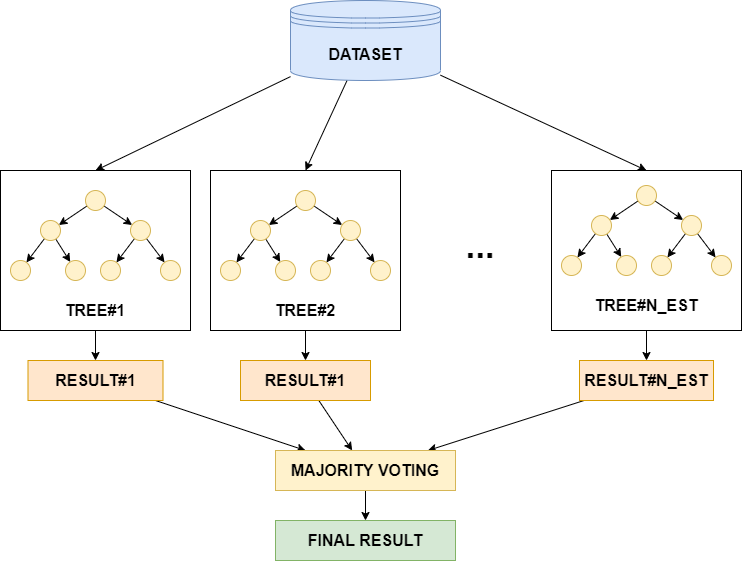

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [211]:
# Melakukan training pada model random forest
rf_admission = RandomForestRegressor()
rf_admission.fit(x_train_admission, y_train_admission)

# Memprediksi data testing
prediction_rf_admission = rf_admission.predict(x_test_admission)

# Menampilkan metrics
regression_metrics(prediction_rf_admission, y_test_admission)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 0.044640000000000034
MSE: 0.0036455980000000016
RMSE: 0.06037878766586823
R_squared: 0.7997759787185273


In [212]:
rf_wine = RandomForestClassifier()
rf_wine.fit(x_train_wine, y_train_wine)

prediction_rf_wine = rf_wine.predict(x_test_wine)

classification_metrics(prediction_rf_wine, y_test_wine)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8643790849673203
F1 Score: 0.8562610090449474
Recall Score: 0.858909476773898
Precision Score: 0.8571647337201159


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [213]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(x_train_admission, y_train_admission)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [214]:
clf.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 20}

In [215]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(x_train_admission, y_train_admission)
predicted = best_hp.predict(x_test_admission)
regression_metrics(predicted, y_test_admission)

MAE: 0.052528901577725114
MSE: 0.00513391576684568
RMSE: 0.07165134867429698
R_squared: 0.7180343911319358


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

## BONUS ROUND: Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Regression Case](https://www.kaggle.com/competitions/lab-4-regression-case?rvi=1)
*   [Kaggle Competition Classification Case](https://www.kaggle.com/competitions/lab-4-klasifikasi-kualitas-wine)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.


# Latihan Soal

## SOAL 2 [10]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 4`
- `random_state = 2023`.

In [109]:
# CODE HERE

dtc_wine2 = DecisionTreeClassifier(max_depth=4, random_state=2023)
dtc_wine2.fit(x_train_wine, y_train_wine)

DecisionTreeClassifier(max_depth=4, random_state=2023)

In [216]:
dtr_admission2 = DecisionTreeRegressor(max_depth=4, random_state=2023)
dtr_admission2.fit(x_train_admission, y_train_admission)

DecisionTreeRegressor(max_depth=4, random_state=2023)

### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) yang didapat pada soal 1a!

In [111]:
#CODE HERE

print(tree.export_text(dtc_wine2, feature_names=pd.Series(x_train_wine.columns).array))

|--- alcohol <= 11.00
|   |--- volatile acidity <= 0.75
|   |   |--- alcohol <= 9.90
|   |   |   |--- chlorides <= 0.12
|   |   |   |   |--- class: 5
|   |   |   |--- chlorides >  0.12
|   |   |   |   |--- class: 3
|   |   |--- alcohol >  9.90
|   |   |   |--- sulphates <= 0.64
|   |   |   |   |--- class: 6
|   |   |   |--- sulphates >  0.64
|   |   |   |   |--- class: 7
|   |--- volatile acidity >  0.75
|   |   |--- total sulfur dioxide <= 49.52
|   |   |   |--- chlorides <= 0.08
|   |   |   |   |--- class: 4
|   |   |   |--- chlorides >  0.08
|   |   |   |   |--- class: 3
|   |   |--- total sulfur dioxide >  49.52
|   |   |   |--- pH <= 3.24
|   |   |   |   |--- class: 5
|   |   |   |--- pH >  3.24
|   |   |   |   |--- class: 4
|--- alcohol >  11.00
|   |--- sulphates <= 0.63
|   |   |--- volatile acidity <= 0.52
|   |   |   |--- pH <= 3.28
|   |   |   |   |--- class: 7
|   |   |   |--- pH >  3.28
|   |   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.52
|   |   |   |--- re

In [217]:
print(tree.export_text(dtr_admission2, feature_names=pd.Series(x_train_admission.columns).array))

|--- CGPA <= 8.73
|   |--- CGPA <= 7.85
|   |   |--- GRE Score <= 306.50
|   |   |   |--- SOP <= 2.75
|   |   |   |   |--- value: [0.49]
|   |   |   |--- SOP >  2.75
|   |   |   |   |--- value: [0.37]
|   |   |--- GRE Score >  306.50
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.55]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.61]
|   |--- CGPA >  7.85
|   |   |--- CGPA <= 8.27
|   |   |   |--- TOEFL Score <= 106.50
|   |   |   |   |--- value: [0.61]
|   |   |   |--- TOEFL Score >  106.50
|   |   |   |   |--- value: [0.71]
|   |   |--- CGPA >  8.27
|   |   |   |--- Serial No. <= 127.00
|   |   |   |   |--- value: [0.65]
|   |   |   |--- Serial No. >  127.00
|   |   |   |   |--- value: [0.72]
|--- CGPA >  8.73
|   |--- CGPA <= 9.05
|   |   |--- Serial No. <= 82.00
|   |   |   |--- CGPA <= 8.89
|   |   |   |   |--- value: [0.76]
|   |   |   |--- CGPA >  8.89
|   |   |   |   |--- value: [0.55]
|   |   |--- Serial No. >  82.00
|   |   |   |--- CGPA <=

### SOAL 2c

[2.5]  Jika model decision tree regressor diberikan data aktual Chance of Admit 0.96, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Chance of Admit` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

In [ ]:
#CODE HERE

### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu red wine yang paling berpotensi untuk dikategorikan sebagai kelas 4. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, cantumkanlah semua kemungkinan pasangan atribut tersebut.

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

In [ ]:
#CODE HERE

## SOAL 3 [15]

### SOAL 3a

[5] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Admission Prediction dan Random Forest Classifier untuk Red Wine) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 3`
- `random_state = 2023`

In [218]:
#CODE HERE

rf_admission2 = RandomForestRegressor(max_depth=3, random_state=2023)
rf_admission2.fit(x_train_admission, y_train_admission)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=3, random_state=2023)

In [114]:
rf_wine2 = RandomForestClassifier(max_depth=3, random_state=2023)
rf_wine2.fit(x_train_wine, y_train_wine)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=3, random_state=2023)

### SOAL 3b

[5] Model Random Forest dianggap kurang dapat diinterpretasikan dibandingkan dengan Decision Tree. Apakah penyebab dari hasil tersebut?

Model Random Forest memang dapat memberikan prediksi yang lebih akurat daripada Decision Tree, akan tetapi kurang dapat diinterpretasikan dibandingkan dengan Decision Tree karena kompleksitas model yang lebih tinggi dan struktur pohon yang kurang terstruktur. Decision Tree dapat diinterpretasikan dengan lebih baik karena struktur pohon yang mudah dipahami, sementara Random Forest sering kali membuat interpretasi yang lebih rumit.

### SOAL 3c

[5] Mekanisme voting dalam Random Forest Classifier adalah cara di mana model ini membuat prediksi akhir berdasarkan hasil dari beberapa Decision Tree yang membentuk ensemble-nya. Apakah yang membedakan mekanisme ini dengan mekanisme pengambil keputusan pada Decision Tree Classifier?

Mekanisme voting dalam Random Forest Classifier berbeda dari mekanisme pengambilan keputusan pada Decision Tree Classifier karena Random Forest menggunakan ensemble learning yang menggabungkan hasil prediksi dari banyak Decision Tree untuk mendapatkan prediksi akhir. Ini membuat Random Forest lebih tahan terhadap overfitting dan dapat memberikan prediksi akhir berdasarkan mayoritas voting yang lebih stabil serta akurat.

## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Admission Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [219]:
#CODE HERE

prediction_admission2 = dtr_admission2.predict(x_test_admission)
regression_metrics(prediction_admission2, y_test_admission)

MAE: 0.05188140809654741
MSE: 0.005058831191582341
RMSE: 0.07112546092351417
R_squared: 0.7221581962238405


In [220]:
prediction_rf_admission2 = rf_admission2.predict(x_test_admission)
regression_metrics(prediction_rf_admission2, y_test_admission)

MAE: 0.04956071772819242
MSE: 0.004251844402136574
RMSE: 0.06520616843624975
R_squared: 0.7664796326805908


- Model kedua memiliki MAE yang lebih rendah daripada model pertama, yang menunjukkan bahwa model kedua memiliki tingkat kesalahan prediksi yang lebih rendah
- Model kedua memiliki MSE yang lebih rendah daripada model pertama, yang menunjukkan bahwa model kedua lebih akurat dalam mengukur sejauh mana perbedaan antara prediksi dan data aktual
- Model kedua memiliki RMSE yang lebih rendah daripada model pertama, yang mengkonfirmasi bahwa model kedua memiliki tingkat kesalahan yang lebih rendah dan memberikan prediksi yang lebih akurat
- Model kedua memiliki R_squared yang lebih tinggi daripada model pertama, yang menunjukkan bahwa model kedua lebih baik dalam menjelaskan variasi dalam data

Maka dari itu, dapat disimpulkan bahwa model kedua lebih baik dalam melakukan prediksi dibandingkan dengan model pertama, berdasarkan hasil evaluasi MAE, MSE, RMSE, dan R-squared.

## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Red Wine Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [117]:
#CODE HERE

prediction_wine2 = dtc_wine2.predict(x_test_wine)
classification_metrics(prediction_wine2, y_test_wine)

Accuracy: 0.511437908496732
F1 Score: 0.49034313759096754
Recall Score: 0.5100700296147036
Precision Score: 0.5016172296718766


In [118]:
prediction_rf_wine2 = rf_wine2.predict(x_test_wine)
classification_metrics(prediction_rf_wine2, y_test_wine)

Accuracy: 0.5669934640522876
F1 Score: 0.5317331835807956
Recall Score: 0.5650903998658853
Precision Score: 0.5588574660633484


- Model kedua memiliki Accuracy yang lebih tinggi daripada model pertama, yang menunjukkan bahwa model kedua memiliki kemampuan yang lebih baik dalam mengklasifikasikan data dengan benar
- Model kedua memiliki F1 Score yang lebih tinggi daripada model pertama, yang menunjukkan bahwa model kedua memiliki accuracy dan recall score yang lebih baik
- Model kedua memiliki Recall Score yang lebih tinggi daripada model pertama, yang menunjukkan bahwa model kedua lebih baik dalam mengidentifikasi jumlah positif dengan benar 
- Model kedua memiliki Precision Score yang lebih tinggi daripada model pertama, yang menunjukkan bahwa model kedua lebih baik dalam menghindari memberikan hasil positif palsu

Maka dari itu, dapat disimpulkan bahwa model kedua lebih baik dalam melakukan prediksi dibandingkan dengan model pertama, berdasarkan hasil evaluasi Accuracy, F1 Score, Recall Score, dan Precisio Score.

## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [221]:
#CODE HERE

clf_admission2 = GridSearchCV(estimator=dtr_admission2, param_grid=param_grid, cv=5)
clf_admission2.fit(x_train_admission, y_train_admission)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, random_state=2023),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [222]:
clf_rf_admission2 = GridSearchCV(estimator=rf_admission2, param_grid=param_grid, cv=5)
clf_rf_admission2.fit(x_train_admission, y_train_admission)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=3, random_state=2023),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [121]:
param_grid2 = {'criterion': ['entropy', 'log_loss', 'gini'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

clf_wine2 = GridSearchCV(estimator=dtc_wine2, param_grid=param_grid2, cv=5)
clf_wine2.fit(x_train_wine, y_train_wine)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=2023),
             param_grid={'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [122]:
clf_rf_wine2 = GridSearchCV(estimator=rf_wine2, param_grid=param_grid2, cv=5)
clf_rf_wine2.fit(x_train_wine, y_train_wine)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, random_state=2023),
             param_grid={'criterion': ['entropy', 'log_loss', 'gini'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

### SOAL 6b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 5a.

In [223]:
#CODE HERE
clf_admission2.best_params_

{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10}

In [224]:
clf_rf_admission2.best_params_

{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_split': 10}

In [125]:
clf_wine2.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}

In [126]:
clf_rf_wine2.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}

### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 5a**

In [225]:
#CODE HERE

dtr_admission3 = DecisionTreeRegressor(criterion='squared_error', max_depth=10, min_samples_split=10)
dtr_admission3.fit(x_train_admission, y_train_admission)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [226]:
rf_admission3 = RandomForestRegressor(criterion='friedman_mse', max_depth=12, min_samples_split=10)
rf_admission3.fit(x_train_admission, y_train_admission)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_split=10)

In [129]:
dtc_wine3 = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=10)
dtc_wine3.fit(x_train_wine, y_train_wine)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [130]:
rf_wine3 = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=10)
rf_wine3.fit(x_train_wine, y_train_wine)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(min_samples_split=10)

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan** hasil evaluasi terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [227]:
#CODE HERE

prediction_rf_admission3 = rf_admission3.predict(x_test_admission)
regression_metrics(prediction_rf_admission3, y_test_admission)

MAE: 0.04376294350429412
MSE: 0.003426298810790597
RMSE: 0.05853459499125792
R_squared: 0.8118203581392077


In [132]:
prediction_rf_wine3 = rf_wine3.predict(x_test_wine)
classification_metrics(prediction_rf_wine3, y_test_wine)

Accuracy: 0.826797385620915
F1 Score: 0.8171988694122537
Recall Score: 0.820507300325605
Precision Score: 0.8168650724917613


In [228]:
prediction_admission3 = dtr_admission3.predict(x_test_admission)
regression_metrics(prediction_admission3, y_test_admission)

MAE: 0.05407687830687831
MSE: 0.005298084421558748
RMSE: 0.07278794145707616
R_squared: 0.7090178983055134


In [134]:
prediction_wine3 = dtc_wine3.predict(x_test_wine)
classification_metrics(prediction_wine3, y_test_wine)

Accuracy: 0.7320261437908496
F1 Score: 0.7258704319626051
Recall Score: 0.726707905354521
Precision Score: 0.729399275862547


In [234]:
df_red_wine_test['quality'] = rf_wine3.predict(df_red_wine_test.drop('Id', axis=1))
df_red_wine_test

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,4077,6.613020,0.368383,0.336781,1.967740,0.067420,26.419891,57.742494,0.992607,3.481273,0.704514,13.290271,8
1,4072,11.061741,0.305193,0.643087,2.488424,0.075846,6.000000,23.231528,0.997594,3.009791,0.868071,10.713341,8
2,4070,7.395133,0.371637,0.351814,2.446018,0.062133,15.000000,31.230090,0.995439,3.263451,0.787876,11.718142,8
3,4060,8.479104,0.474308,0.228908,2.176526,0.070556,36.469471,53.951832,0.994275,3.311832,0.706045,12.422185,8
4,4053,9.547942,0.305690,0.556586,2.777240,0.078862,5.886199,16.886199,0.996491,3.150000,0.889274,11.620339,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,22,7.900000,0.430000,0.210000,1.600000,0.106000,10.000000,37.000000,0.996600,3.170000,0.910000,9.500000,5
608,19,7.900000,0.320000,0.510000,1.800000,0.341000,17.000000,56.000000,0.996900,3.040000,1.080000,9.200000,5
609,18,7.400000,0.590000,0.080000,4.400000,0.086000,6.000000,29.000000,0.997400,3.380000,0.500000,9.000000,4
610,13,7.800000,0.610000,0.290000,1.600000,0.114000,9.000000,29.000000,0.997400,3.260000,1.560000,9.100000,5


In [232]:
df_admission_prediction_test['Chance of Admit'] = rf_admission3.predict(df_admission_prediction_test.drop('Id', axis=1))
df_admission_prediction_test

,Id,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,497,498,330,120,5,4.5,5.0,9.56,1,0.931719
1,495,496,332,108,5,4.5,4.0,9.02,1,0.833767
2,494,495,301,99,3,2.5,2.0,8.45,1,0.649379
3,491,492,297,99,4,3.0,3.5,7.81,0,0.517586
4,490,491,307,105,2,2.5,4.5,8.12,1,0.660044
...,...,...,...,...,...,...,...,...,...,...
145,15,16,314,105,3,3.5,2.5,8.30,0,0.624842
146,11,12,327,111,4,4.0,4.5,9.00,1,0.784032
147,9,10,323,108,3,3.5,3.0,8.60,0,0.655309
148,2,3,316,104,3,3.0,3.5,8.00,1,0.613233


In [235]:
df_red_wine_test[['Id', 'quality']].to_csv('submission_wine.csv', index=False)

In [236]:
df_admission_prediction_test[['Id', 'Chance of Admit']].to_csv('submission_admission.csv', index=False)

## SOAL 7 [5]
1. [2] Jelaskan konsep bootstrapping dalam konteks Random Forests. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?
2. [1] Bagaimana prediksi dari seluruh Decision Tree Regressor digabungkan dalam Random Forest Regressor?
3. [2] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas Red Wine pada Lab 4 ini.

1. Bootstrapping adalah konsep pengambilan sampel dengan pengembalian dari data train yang digunakan untuk melatih setiap decision tree dalam Random Forest. Hal ini berkontribusi pada keragaman model karena setiap pohon akan mengambil sampel yang berbeda. Dengan pengambilan sampel acak, setiap decision tree akan dilatih pada subset yang berbeda dari data, sehingga masing-masing memiliki fokus yang berbeda.
2. Prediksi dari seluruh Decision Tree Regressor digabungkan dalam Random Forest Regressor dengan ensemble learning. Setiap decision tree menghasilkan prediksi, lalu rata-rata dari prediksi ini diambil untuk memberikan prediksi akhir. Dengan demikian, setiap decision tree memberikan suaranya, dan hasil akhir adalah hasil voting dari semua pohon.
3. Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas dengan konsep mayoritas suara. Setiap decision tree menghasilkan prediksi dari kelas yang berbeda, lalu rata-rata dari prediksi ini diambil untuk memberikan prediksi akhir.

## SOAL 8 [5]

1. [2.5] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?
2. [2.5] Apakah *scaling* atau *feature normalization* diperlukan untuk Random Forest? Mengapa atau mengapa tidak?

1. Unsur randomness melalui bootstrapping dan feature selection dalam Random Forest dapat membuat hasil menjadi kurang reproduksibel karena menyebabkan variasi dalam hasil prediksi pada setiap iterasi. Untuk memastikan output yang konsisten, kita dapat menentukan random_state.
2. Random Forest relatif tidak memerlukan scaling atau feature normalization karena algoritmanya tidak bergantung pada skala atribut. Pendekatan Decision Trees dalam Random Forest hanya membandingkan atribut dengan nilai batas tertentu, sehingga perubahan skala atribut tidak akan memengaruhi hasilnya.